In [ ]:
import sqlite3
import pandas as pd
import os

## Warmup: SQL query clauses
- **SELECT**: column, column, ...  or *
- **FROM**: table
- **WHERE**:  boolean expression (if row has ....)
 - can use **AND**, **OR**, **NOT**
- **ORDER BY**  column (**ASC**, **DESC**)
- **LIMIT**: num rows

## Warmup 0: Open a connection to the movies database `movies.db`

In [ ]:
# write your code here

## Warmup 1: What are the table names?

In [ ]:
# write your code here

## Warmup 2: What are the data types?

In [ ]:
# write your code here

## Warmup 3: What is the data in the `movies` table?

In [ ]:
# write your code here

#### This function allows to type less for each query

In [ ]:
def qry(sql, conn=...):
    return pd.read_sql(sql, conn)

qry("""
SELECT *
FROM movies
""")

## Warmup 4: What's the *Title* of the movie with the highest *Rating*?

In [ ]:
# write your code here

## Warmup 5: Which *Director* made the movie with the shortest *Runtime*?

In [ ]:
# write your code here

## Warmup 6: What was the *Director*  and *Title* of the movie with the largest *Revenue*?

In [ ]:
# write your code here

## Warmup 7: What is the *Title* of the movie with the highest *Revenue* in *Year* 2016?

In [ ]:
# write your code here

## Warmup 8: Which *3 movies*  had the highest *Revenue* in the *Year* 2016?

In [ ]:
# write your code here

## Lecture 33: Database 2
Learning Objectives:
- Use the `AS` command to rename a column or a calculation
- Use SQL Aggregate functions to summarize database columns: 
 - `SUM`, `AVG`, `COUNT`, `MIN`, `MAX`, `DISTINCT`
- Use the `GROUP BY` command to place database rows into buckets.
- Use the `HAVING` command to apply conditions to groups.

## Example 1: Which *3 movies* have the highest *revenue-per-minute*?

The `AS` clause lets us rename a column or a calcuation

In [ ]:
qry("""
SELECT title, revenue, rUnTiME, revenue / runtime AS RPM
FROM movies
ORDER BY RPM DESC
LIMIT 3
""")

## Aggregate Queries

```
SUM, AVG, COUNT, MIN, MAX, DISTINCT
```

## Example 2: How many *rows of movies* are there?
Note: when we want to count the number of rows, we use COUNT(*)

In [ ]:
qry("""
SELECT COUNT(*)
FROM movies
""")

## Example 3: How many *directors* are there?

In [ ]:
# This doesn't feel correct - it counts duplicates for director names!
qry("""
SELECT COUNT(director)
FROM movies
""")

#### Use `COUNT(DISTINCT columname)`

In [ ]:
qry("""
SELECT COUNT(DISTINCT director)
FROM movies
""")

## Example 4: What are the names of the *directors* (without duplicates)?

In [ ]:
df = qry("""
SELECT DISTINCT director
FROM movies
""")
list(df["Director"])

## Example 5: What is the total *Revenue* of *all the movies*?

In [ ]:
qry("""
SELECT SUM(revenue) as "Total Revenue"
FROM movies
""").iloc[0]["Total Revenue"] * 1e6

## Example 6: What is the *average rating* across *all movies*?

* version 1: with `SUM` and `COUNT`
* version 2: with `AVG`

In [ ]:
qry("""
SELECT SUM(rating) / COUNT(*)
FROM movies
""")  #.iloc[0][0]

In [ ]:
qry("""
SELECT AVG(rating)
FROM movies
""")  #.iloc[0][0]

## Example 7: What is the *average revenue* and *average runtime* of *all the movies*?

In [ ]:
qry("""
SELECT AVG(revenue), AVG(runtime)
FROM movies
""")

## Example 8: What is the *average revenue* for a *Ridley Scott* movie?

In [ ]:
qry("""
SELECT AVG(revenue)
FROM movies
WHERE director = "Ridley Scott"
""")  #.iloc[0][0]

## Example 9: *How many movies* were there in *2016*?

In [ ]:
qry("""
SELECT COUNT(*)
FROM movies
WHERE year = 2016
""")  #.iloc[0][0]

## Example 10: What was the revenue of *highest-revenue movie*?

In [ ]:
qry("""
SELECT revenue
FROM movies
ORDER BY revenue DESC
LIMIT 1
""") # .iloc[0][0]

In [ ]:
qry("""
SELECT MAX(revenue) 
FROM movies
""") # .iloc[0][0]

# GROUP BY Queries

```sql
SELECT ???, ??? FROM Movies
GROUP BY ???
```

## Example 11: What is the *total revenue* for each *year*?

In [ ]:
qry("""
SELECT year, SUM(revenue)
FROM movies
GROUP BY year
""")

## Example 12: *How many movies* were by each *director*?

In [ ]:
qry("""
SELECT director, COUNT(*) AS mov_count
FROM movies
GROUP BY director
ORDER BY mov_count DESC
limit 10
""") 

## Example 13: What is the *average rating* for each *director*?

In [ ]:
qry("""
SELECT director, AVG(rating)
FROM movies
GROUP BY director
""")

## Example 14: How many *unique directors* created a movie in each *year*

In [ ]:
qry("""
SELECT year, COUNT(DISTINCT director) AS director_count
FROM movies
GROUP BY year
""")

## Combining GROUP BY with other CLAUSES

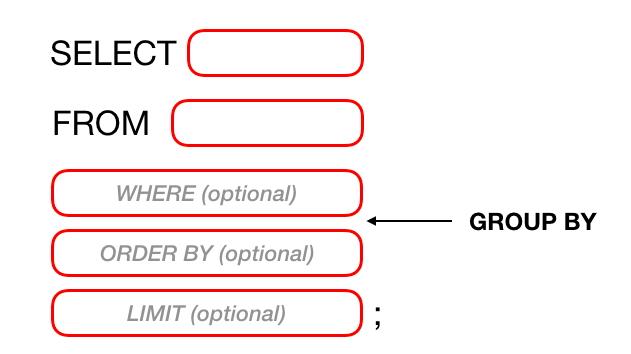

## Example 15: What is the *total revenue* of per *year*, in *recent* years?

In [ ]:
# recent means 5 years
qry("""
SELECT year, SUM(revenue) AS total_revenue
FROM movies
GROUP BY Year
ORDER BY Year DESC
LIMIT 5
""")

## Example 16: Which 5 *directors* have had the *most number of movies* earning *over 200M dollars*?

In [ ]:
qry("""
SELECT director, COUNT(title) AS count
FROM movies
WHERE revenue > 200
GROUP BY director
ORDER BY count DESC
limit 5
""")

## Example 17: Which *three* of the *directors* have the *greatest average rating*?

In [ ]:
qry("""
SELECT director, AVG(rating) AS avg_rating
FROM movies
GROUP BY director
ORDER BY avg_rating DESC
LIMIT 3
""")

**Food for thought:** Why is the above question maybe not the best to ask?

Need filtering **BEFORE** and **AFTER** the `GROUP` operations
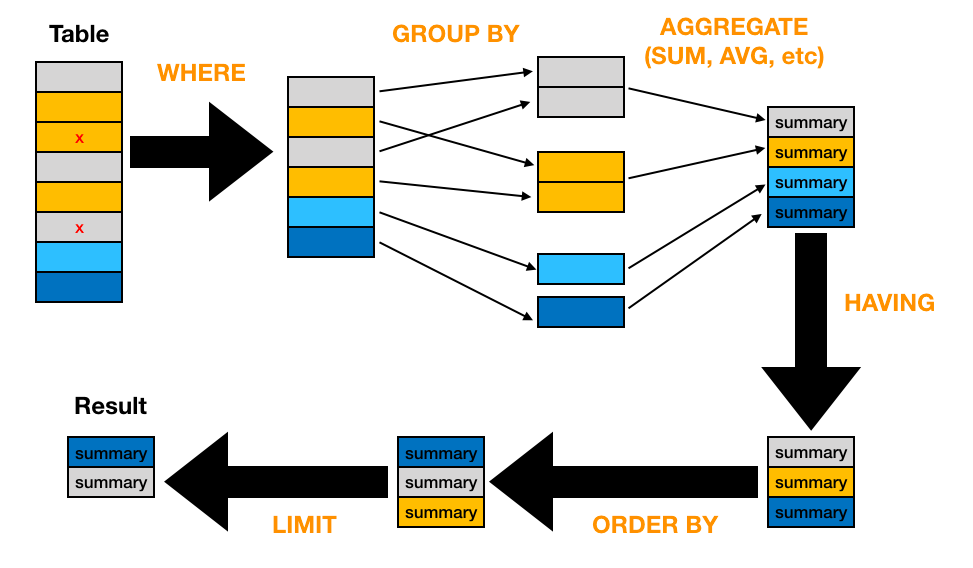

# WHERE vs. HAVING

* **WHERE**: filter rows in original table
* **HAVING**: filter groups

## Example 18: Which five directors *having* at least 3 movies score the *greatest average rating* ?

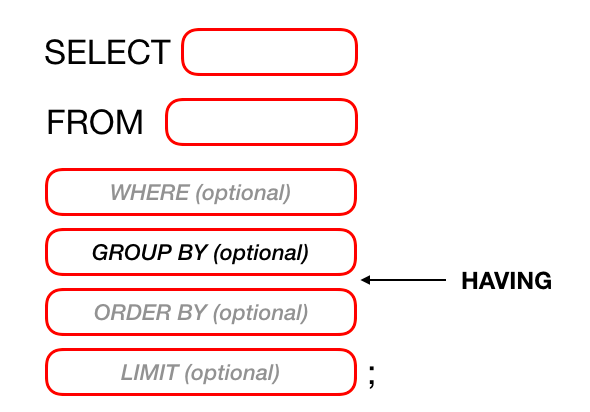

In [ ]:
qry("""
SELECT director, AVG(rating) AS avg_rating, COUNT(*) as count
FROM movies
GROUP BY director
HAVING count >= 3
ORDER BY avg_rating DESC
LIMIT 3
""")

## Example 19: Which directors have more than 3 movies released since 2010?

In [ ]:
qry("""
SELECT director, COUNT(title) AS count
FROM movies
WHERE year >= 2010
GROUP BY director
HAVING count > 3
""")

## Example 20: Which *directors* have more than *two* movies with runtimes under *100* minutes

In [ ]:
qry("""
SELECT director, COUNT(title) AS count
FROM movies
WHERE runtime < 100
GROUP BY director
HAVING count > 2
""")

# Don't forget to close the `movies.db` connection

In [ ]:
# close the connection here